In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Employee_Data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### The data set contains 5 features of continous values and 5 of categorical values 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### The following steps converts the categorical columns to object type

In [4]:

continuous_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident             object
left                      object
promotion_last_5years     object
sales                     object
salary                    object
dtype: object

#### The following step describes the continous features distribution 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0


#### The following statistics are for categorical variables

In [6]:
df.describe(include='object')

,Work_accident,left,promotion_last_5years,sales,salary
count,14999,14999,14999,14999,14999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,12830,11428,14680,4140,7316


#### Plotting the continous features vs target variable 

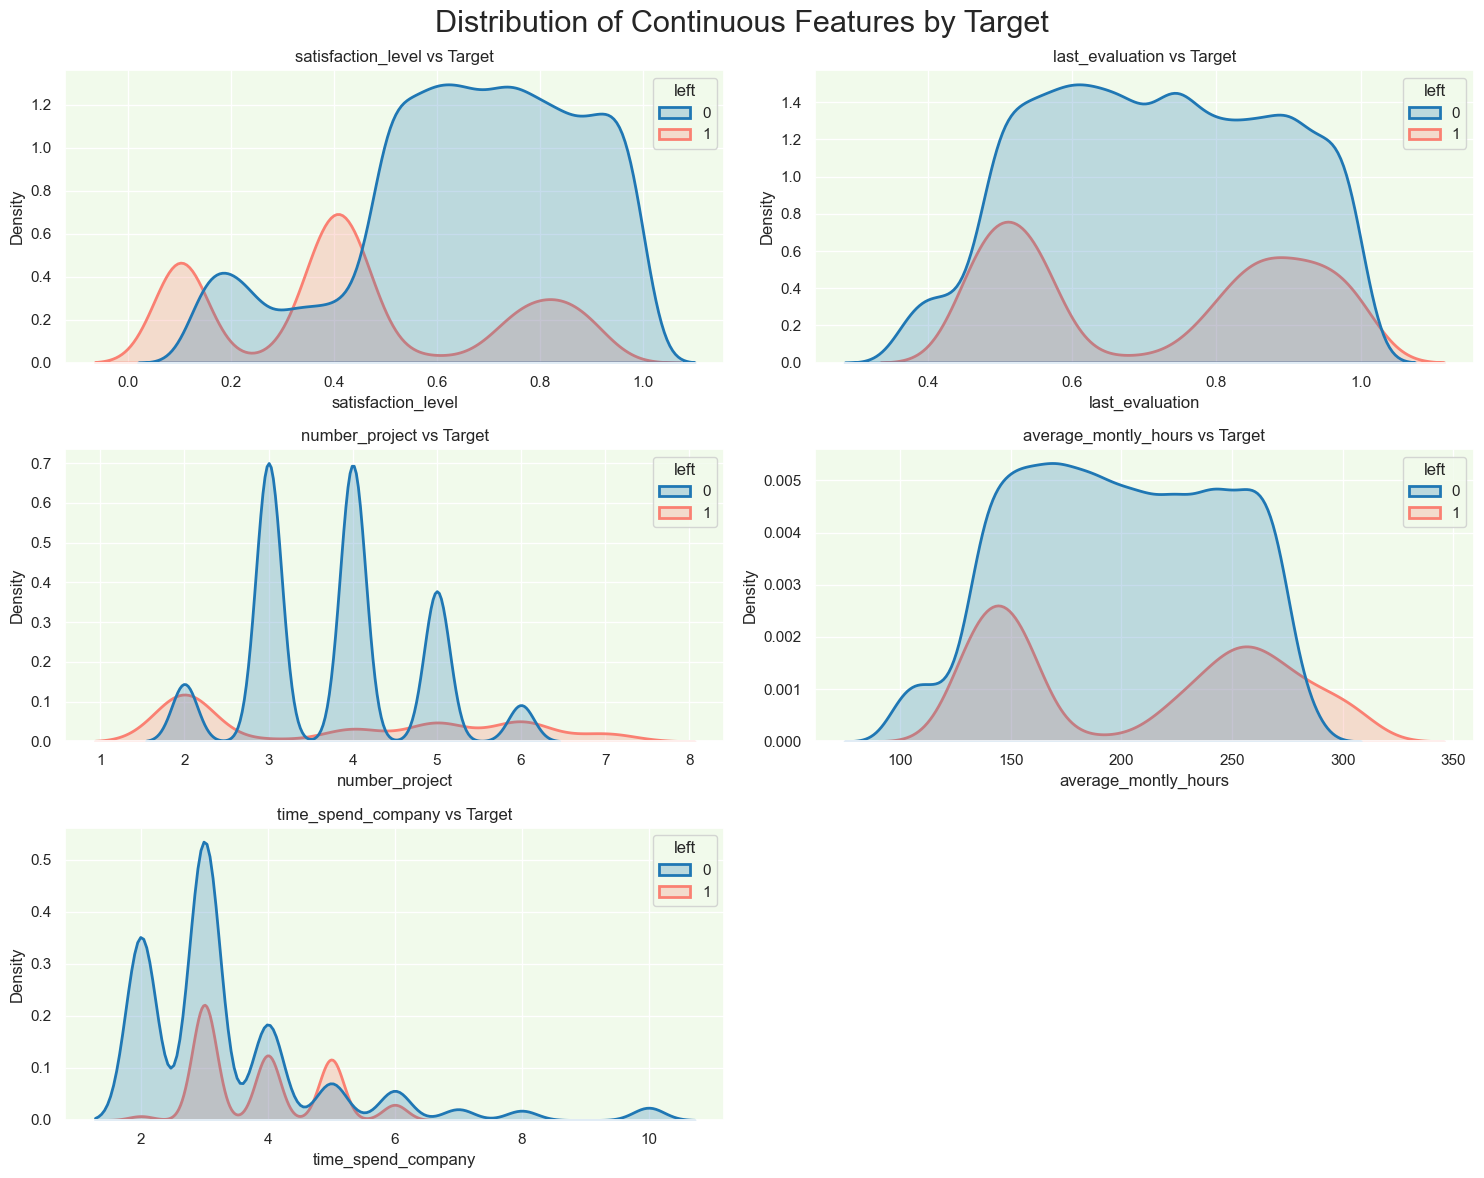

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': '#f1faeb'}, style='darkgrid')

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for ax, col in zip(axes.flatten(), continuous_features):
    sns.kdeplot(data=df, x=col, fill=True, linewidth=2, hue='left', ax=ax, palette = {0: '#1f77b4', 1: '#FA8072'})
    ax.set_title(f'{col} vs Target')

axes[2,1].axis('off')
plt.suptitle('Distribution of Continuous Features by Target', fontsize=22)
plt.tight_layout()
plt.show()

#### Plotting the categorical features vs Target

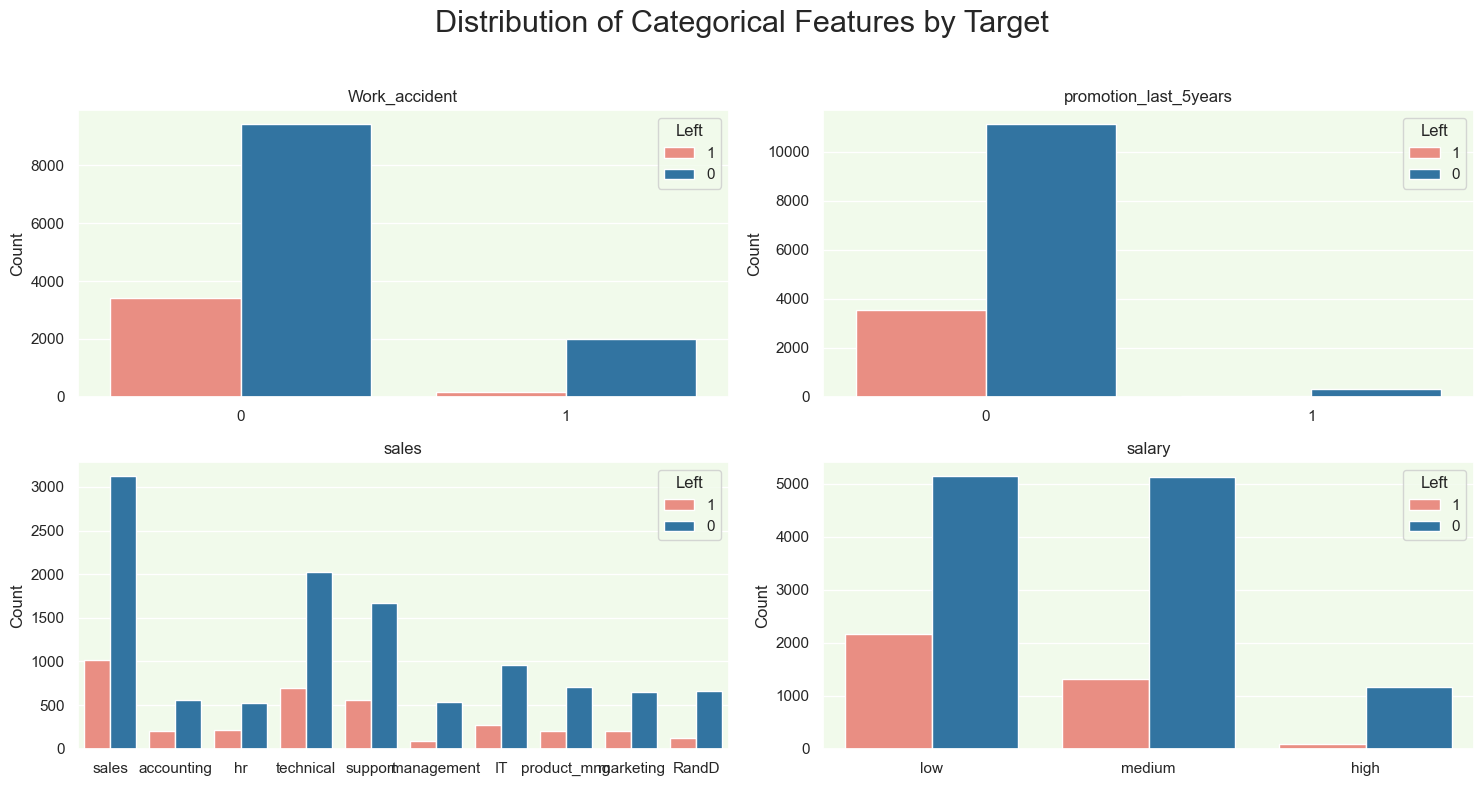

In [9]:

df['left'] = df['left'].astype(str)

cat_features = ['Work_accident', 'promotion_last_5years', 'sales', 'salary']

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=cat_features[i], hue='left', data=df, ax=ax, palette={'0': '#1f77b4', '1': '#FA8072'})
    ax.set_title(cat_features[i])
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.legend(title='Left', loc='upper right')

plt.suptitle('Distribution of Categorical Features by Target', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

#### For finding the missing values in the dataset

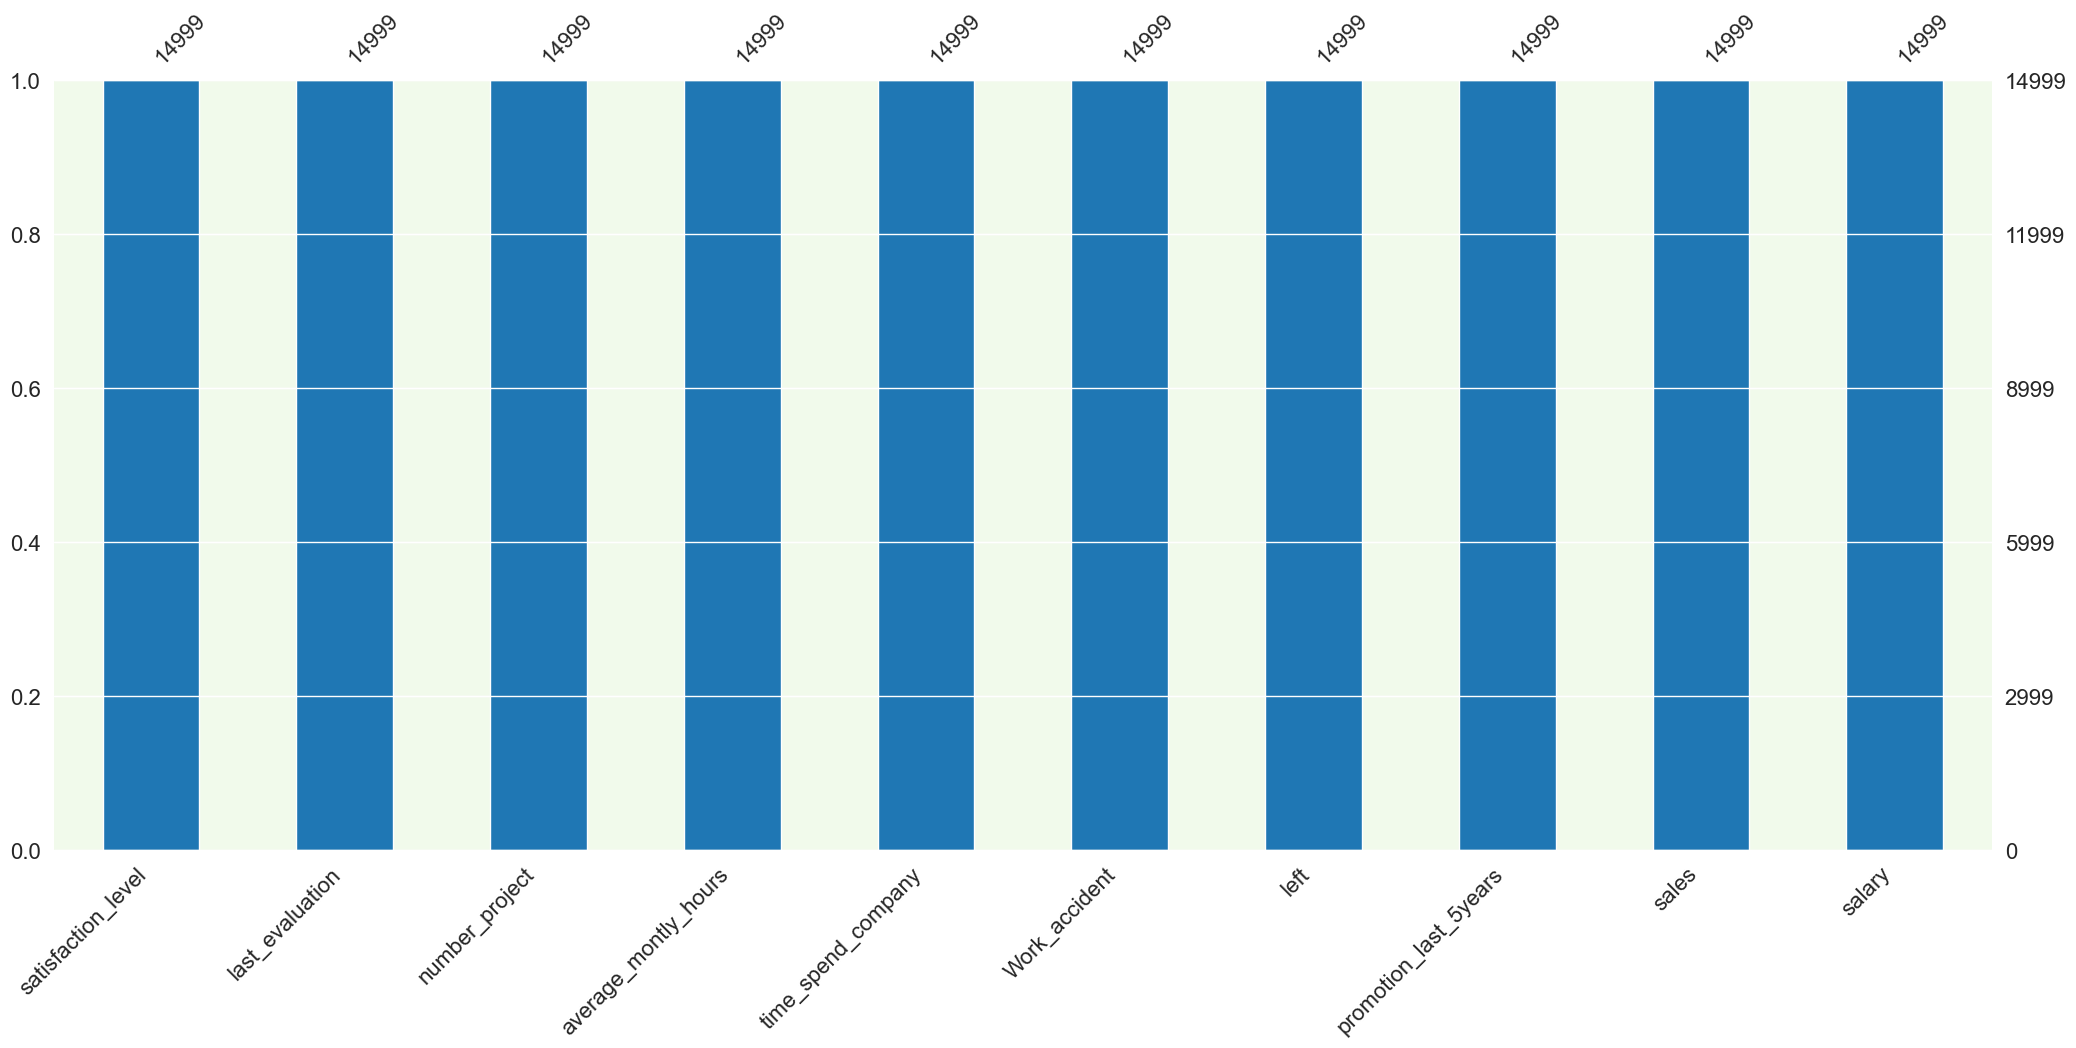

In [10]:
import missingno as msno

msno.bar(df, color='#1f77b4')

plt.show()

#### Encoding the categorical values to numerical values acoording to ordinal and nominal values I have used Label encoding and One-hot encoding


In [11]:
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(df, columns=['sales','Work_accident','promotion_last_5years'], drop_first=True)


le = LabelEncoder()
df_encoded['salary'] = le.fit_transform(df_encoded['salary'])

df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,Work_accident_1,promotion_last_5years_1
0,0.38,0.53,2,157,3,1,1,0,0,0,0,0,0,1,0,0,0,0
1,0.80,0.86,5,262,6,1,2,0,0,0,0,0,0,1,0,0,0,0
2,0.11,0.88,7,272,4,1,2,0,0,0,0,0,0,1,0,0,0,0
3,0.72,0.87,5,223,5,1,1,0,0,0,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,1,1,0,0,0,0,0,0,1,0,0,0,0


In [12]:
df_encoded.dtypes

satisfaction_level         float64
last_evaluation            float64
number_project               int64
average_montly_hours         int64
time_spend_company           int64
left                        object
salary                       int64
sales_RandD                  uint8
sales_accounting             uint8
sales_hr                     uint8
sales_management             uint8
sales_marketing              uint8
sales_product_mng            uint8
sales_sales                  uint8
sales_support                uint8
sales_technical              uint8
Work_accident_1              uint8
promotion_last_5years_1      uint8
dtype: object

#### Defining the features (X) and the output labels (y)

In [13]:
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

#### Splitting data into train and test sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Note

#### We are going to use regression algorithms instead of classification algorithms in this project for three main reasons:
<br>

#### Probabilistic Interpretation:
Regression algorithms can predict a continuous output which can be interpreted as the probability of a certain event. In this case, the output can be interpreted as the probability that an employee will leave the company. This information can be more informative than just a binary output and can help in understanding how 'at risk' each employee is of leaving.
<br>

#### Threshold Calibration:
By predicting probabilities, we can adjust the threshold for classifying an observation as 0 or 1. For example, we might classify all employees with a predicted probability of leaving greater than 0.5 as 'will leave'. However, we can adjust this threshold to be more conservative or more liberal depending on the cost of false positives and false negatives. For example, if it is more costly to incorrectly predict that an employee will stay when they actually leave, we might lower the threshold to 0.3 to identify more employees at risk of leaving.
<br>

#### Imbalanced Data:
The target variable, `left`, is imbalanced with a larger proportion of employees who did not leave the company. This can sometimes lead to poor performance for classification algorithms because they have a bias towards the majority class. Regression algorithms do not have this bias and can sometimes perform better on imbalanced data.
<br>

#### Summary:
Using regression algorithms will allow for a more nuanced understanding of the risk of each employee leaving, allow for threshold calibration, and might perform better on imbalanced data.


### Multiple linear regression model

In [15]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

#### The following is the evaluation function for finding the losses according to a model

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_regression_model(model, X_train, y_train, X_test, y_test, model_name):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    print(f" {model_name} - Training Metrics")
    print(f"MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")
    
    print(f"\n {model_name} - Testing Metrics")
    print(f"MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")

    return pd.DataFrame({
        'Train': [mae_train, mse_train, rmse_train, r2_train],
        'Test': [mae_test, mse_test, rmse_test, r2_test]
    }, index=['MAE', 'MSE', 'RMSE', 'R2 Score'])


#### Results of Multiple Linear Regression

In [19]:
lr_results = evaluate_regression_model(lr_model, X_train, y_train, X_test, y_test, "Multiple Linear Regression")

 Multiple Linear Regression - Training Metrics
MAE: 0.3046, MSE: 0.1457, RMSE: 0.3817, R2: 0.1970

 Multiple Linear Regression - Testing Metrics
MAE: 0.3037, MSE: 0.1453, RMSE: 0.3811, R2: 0.1991


### Decision Tree model

In [20]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

#### Results of Decision Tree

In [21]:
dt_results = evaluate_regression_model(
    dt_model, X_train, y_train, X_test, y_test, "Decision Tree Regression"
)

 Decision Tree Regression - Training Metrics
MAE: 0.0000, MSE: 0.0000, RMSE: 0.0000, R2: 1.0000

 Decision Tree Regression - Testing Metrics
MAE: 0.0197, MSE: 0.0197, RMSE: 0.1402, R2: 0.8916


### Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

#### Result of Random Forest

In [23]:
rf_results = evaluate_regression_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest Regression")

 Random Forest Regression - Training Metrics
MAE: 0.0100, MSE: 0.0016, RMSE: 0.0398, R2: 0.9913

 Random Forest Regression - Testing Metrics
MAE: 0.0276, MSE: 0.0110, RMSE: 0.1047, R2: 0.9395


### CatBoost Model

In [24]:
from catboost import CatBoostRegressor

ctb_base = CatBoostRegressor(verbose=0)

#### Defining the parameters for grid search

In [25]:
ctb_param_grid = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

#### The following process is for tuning the intially considered hyperparameters

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
def tune_regressor_hyperparameters(reg, param_grid, X_train, y_train, scoring='neg_mean_squared_error', n_splits=3):

    cv = KFold(n_splits=n_splits, shuffle=True, random_state=0)

    reg_grid = GridSearchCV(reg, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    reg_grid.fit(X_train, y_train)

    best_hyperparameters = reg_grid.best_params_

    return reg_grid.best_estimator_, best_hyperparameters

#### Tuning the hyperparameters

In [30]:
best_ctb, best_ctb_hyperparameters = tune_regressor_hyperparameters(ctb_base, ctb_param_grid, X_train, y_train)

In [31]:
print('\nCatBoost Regressor Optimal Hyperparameters: \n', best_ctb_hyperparameters)


CatBoost Regressor Optimal Hyperparameters: 
 {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


#### Results of CatBoost Model

In [32]:
ctb_result = evaluate_regression_model(best_ctb, X_train, y_train, X_test, y_test, 'CatBoost')

 CatBoost - Training Metrics
MAE: 0.0234, MSE: 0.0037, RMSE: 0.0612, R2: 0.9794

 CatBoost - Testing Metrics
MAE: 0.0392, MSE: 0.0116, RMSE: 0.1078, R2: 0.9359


### XGBoost Model

#### Defining the model

In [34]:
import xgboost as xgb
xgb_base = xgb.XGBRegressor(objective ='reg:squarederror')

#### Initial hyperparameters for grid search

In [35]:
xgb_param_grid = {
    'max_depth': [4, 5],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [200, 250, 300],
    'min_child_weight': [2, 3, 4]
}

#### Tuning the hyperparameters

In [36]:
best_xgb, best_xgb_hyperparameters = tune_regressor_hyperparameters(xgb_base, xgb_param_grid, X_train, y_train)

In [37]:
print('XGBoost Regressor Optimal Hyperparameters: \n', best_xgb_hyperparameters)

XGBoost Regressor Optimal Hyperparameters: 
 {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300}


#### Result of XGBoost Model

In [38]:
xgb_result = evaluate_regression_model(best_xgb, X_train, y_train, X_test, y_test, 'XGBoost')

 XGBoost - Training Metrics
MAE: 0.0253, MSE: 0.0040, RMSE: 0.0633, R2: 0.9779

 XGBoost - Testing Metrics
MAE: 0.0436, MSE: 0.0126, RMSE: 0.1123, R2: 0.9305


## Note
The following is the classification analysis on catboost model. Till now we have trained the each and every model using regression based metgod and before starting the regression method the reason for this step is already mentioned . And now the disadvantage of chossing the classification model will be practically proven
<br>

### CatBoost Classification Model

In [43]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


import xgboost as xgb

xgb_clf_base = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss')

#### defining the hyperparameter tuner

In [44]:
def tune_classifier_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=3):
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    clf_grid.fit(X_train, y_train)
    return clf_grid.best_estimator_, clf_grid.best_params_

#### initial values of hyperparameters

In [45]:
xgb_clf_param_grid = {
    'max_depth': [4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'min_child_weight': [2, 3]
}

#### tuning hyperparameters

In [46]:
best_xgb_clf, best_xgb_clf_hyperparams = tune_classifier_hyperparameters(
    xgb_clf_base, xgb_clf_param_grid, X_train, y_train
)

print(" Best Hyperparameters:\n", best_xgb_clf_hyperparams)

 Best Hyperparameters:
 {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 200}


#### Model Evaluation function for Classification 
</br>
Even though this is a classification model, I have opted for regression metrics inorder to compare with regression models.

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def evaluate_classifier_regression_metrics(model, X_train, y_train, X_test, y_test, model_name):
    # Get probabilities for class 1 ("left")
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]

    # Training metrics
    mae_train = mean_absolute_error(y_train, y_train_pred_prob)
    mse_train = mean_squared_error(y_train, y_train_pred_prob)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred_prob)

    # Testing metrics
    mae_test = mean_absolute_error(y_test, y_test_pred_prob)
    mse_test = mean_squared_error(y_test, y_test_pred_prob)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred_prob)

    print(f"\n {model_name} Training Regression Metrics:")
    print("MAE: {:.4f}".format(mae_train))
    print("MSE: {:.4f}".format(mse_train))
    print("RMSE: {:.4f}".format(rmse_train))
    print("R2 Score: {:.4f}".format(r2_train))

    print(f"\n {model_name} Testing Regression Metrics:")
    print("MAE: {:.4f}".format(mae_test))
    print("MSE: {:.4f}".format(mse_test))
    print("RMSE: {:.4f}".format(rmse_test))
    print("R2 Score: {:.4f}".format(r2_test))

    # Return as DataFrame for easy comparison if needed
    metrics_df = pd.DataFrame({
        'Train': [mae_train, mse_train, rmse_train, r2_train],
        'Test': [mae_test, mse_test, rmse_test, r2_test]
    }, index=['MAE', 'MSE', 'RMSE', 'R2 Score'])

    return metrics_df

#### Results of XGBoost Classification Model

In [48]:
xgb_prob_metrics = evaluate_classifier_regression_metrics(
    best_xgb_clf, X_train, y_train, X_test, y_test, 'XGBoost Classifier'
)


 XGBoost Classifier Training Regression Metrics:
MAE: 0.0181
MSE: 0.0050
RMSE: 0.0706
R2 Score: 0.9725

 XGBoost Classifier Testing Regression Metrics:
MAE: 0.0280
MSE: 0.0131
RMSE: 0.1143
R2 Score: 0.9280


#### From above we can observe that the testing data has more error(even though it is a very less value) than training data which shows that the model overfits when using the classification model

## Conclusion

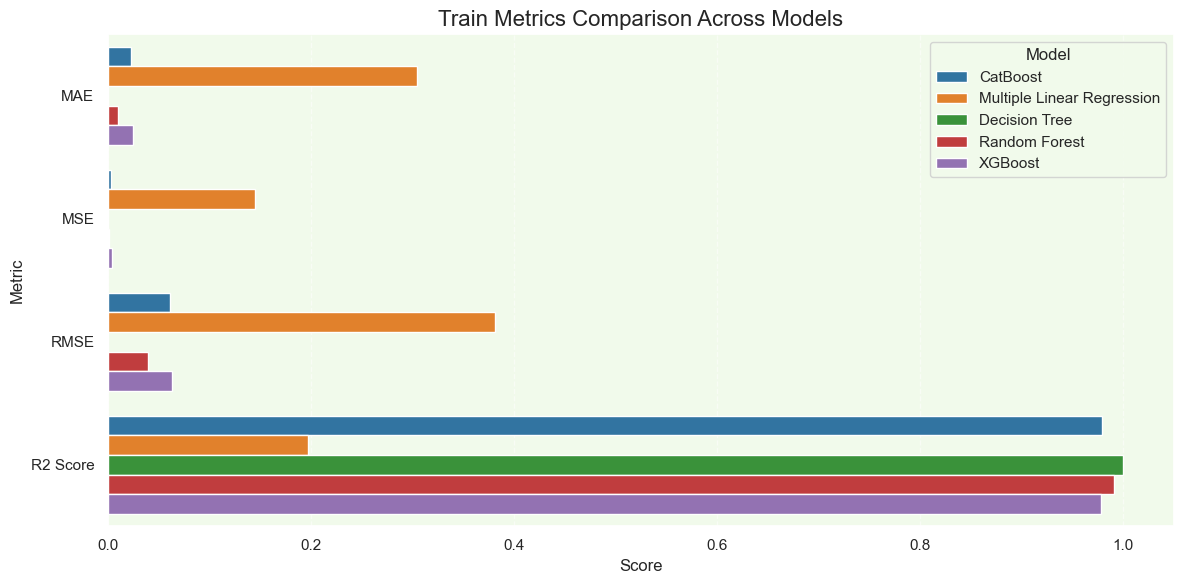

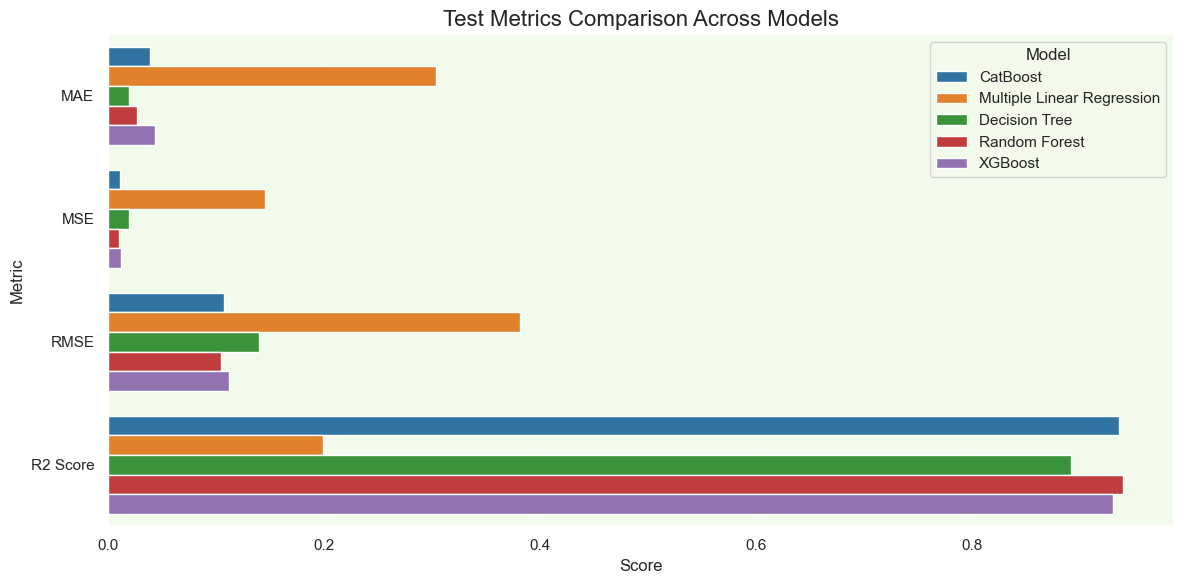

In [42]:
# Step 1: Prepare the combined DataFrame
common_metrics = ['MAE', 'MSE', 'RMSE', 'R2 Score']

def prepare_result_df(result, model_name):
    df = result.copy()

    # If metrics are in index, transpose
    if df.shape[0] == 4 and set(df.index) == set(common_metrics):
        df = df.T

    df = df.reset_index().rename(columns={'index': 'Dataset'})
    df['Model'] = model_name
    return df[['Dataset'] + common_metrics + ['Model']]

# Prepare all model results
df_ctb = prepare_result_df(ctb_result, 'CatBoost')
df_lr  = prepare_result_df(lr_results, 'Multiple Linear Regression')
df_dt  = prepare_result_df(dt_results, 'Decision Tree')
df_rf  = prepare_result_df(rf_results, 'Random Forest')
df_xgb = prepare_result_df(xgb_result, 'XGBoost')

# Combine them
combined_df = pd.concat([df_ctb, df_lr, df_dt, df_rf, df_xgb], ignore_index=True)

# Melt for seaborn
melted_df = combined_df.melt(
    id_vars=['Model', 'Dataset'],
    var_name='Metric',
    value_name='Score'
)
melted_df['Score'] = pd.to_numeric(melted_df['Score'], errors='coerce')

# Step 2: Separate Train and Test data
train_df = melted_df[melted_df['Dataset'] == 'Train']
test_df = melted_df[melted_df['Dataset'] == 'Test']

# Step 3: Plot Train Metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=train_df, x='Score', y='Metric', hue='Model', palette='tab10')
plt.title('Train Metrics Comparison Across Models', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 4: Plot Test Metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=test_df, x='Score', y='Metric', hue='Model', palette='tab10')
plt.title('Test Metrics Comparison Across Models', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### By these plot we can conclude that CatBoost,Random Forest,XGBoost are performing equally and are better than ML Regression, Decision Tree. The reason might be because of their sophisticated algorithms